## Passenger count analysis on London underground stations and ML predictive models

In [44]:
#IMPORTING ALL THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
#Loading the dataframes

df2013 = pd.read_csv('2013.csv')
print(df2013.head(3))

df2014 = pd.read_csv('2014.csv')
print(df2014.head(3))

df2015 = pd.read_csv('2015.csv')
print(df2015.head(3))

df2016 = pd.read_csv('2016.csv')
print(df2016.head(3))

df2017 = pd.read_csv('2017.csv')
print(df2017.head(3))

df2018 = pd.read_csv('2018.csv')
print(df2018.head(3))

df2019 = pd.read_csv('2019.csv')
print(df2019.head(3))

df2020 = pd.read_csv('2020.csv')
print(df2020.head(3))

df2021 = pd.read_csv('2021.csv')
print(df2021.head(3))


   NLC                              Station  WeekdayEnEx  SaturdayEnEx  \
0  500  Acton Town                                 18071         12654   
1  502  Aldgate                                    24569          6539   
2  503  Aldgate East                               36467         24047   

   SundayEnEx  TotalEnExCount  Year  
0        8797         5750000  2013  
1        5453         6880000  2013  
2       20111        11660000  2013  
   NLC       Station  WeekdayEnEx  SaturdayEnEx  SundayEnEx  TotalEnExCount  \
0  500    Acton Town        18797         13982        9768         6060000   
1  502       Aldgate        25746          6936        5884         7220000   
2  503  Aldgate East        37843         26858       21646        12250000   

   Year  
0  2014  
1  2014  
2  2014  
   NLC                              Station  WeekdayEnEx  SaturdayEnEx  \
0  500  Acton Town                                 19401         14197   
1  502  Aldgate                               

In [46]:
#checking for unified column names
print(df2013.columns.tolist())
print(df2014.columns.tolist())
print(df2015.columns.tolist())
print(df2016.columns.tolist())
print(df2017.columns.tolist())
print(df2018.columns.tolist())
print(df2019.columns.tolist())
print(df2020.columns.tolist())
print(df2021.columns.tolist())

['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'Borough', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']


In [47]:
#dropping additional column
df2016 = df2016.drop('Borough',axis=1)

In [48]:
print(df2013.columns.tolist())
print(df2014.columns.tolist())
print(df2015.columns.tolist())
print(df2016.columns.tolist())
print(df2017.columns.tolist())
print(df2018.columns.tolist())
print(df2019.columns.tolist())
print(df2020.columns.tolist())
print(df2021.columns.tolist())

['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']
['NLC', 'Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'TotalEnExCount', 'Year']


In [49]:
#merging all df to create single df

merged_df = pd.concat([df2013,df2014,df2015,df2016,df2017,df2018,df2019,df2020,df2021])
merged_df.shape
merged_df.to_csv('merged_df_allyears.csv')

In [50]:
#Checking for null values
merged_df.isnull().sum()

NLC               0
Station           0
WeekdayEnEx       1
SaturdayEnEx      1
SundayEnEx        1
TotalEnExCount    1
Year              0
dtype: int64

In [51]:
#displaying null rows
null_data = merged_df[merged_df.isnull().any(axis=1)]
null_data

,NLC,Station,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
102,781,Heathrow Terminal 4 LU,NaN,NaN,NaN,NaN,2020


In [52]:
#Replacing null value with zero, as it is zero on those stations due to closing
merged_df1 = merged_df.fillna(0)
merged_df1.isnull().sum()

NLC               0
Station           0
WeekdayEnEx       0
SaturdayEnEx      0
SundayEnEx        0
TotalEnExCount    0
Year              0
dtype: int64

In [53]:
#Changing datatype
merged_df1['WeekdayEnEx'] = merged_df1['WeekdayEnEx'].astype(int)
merged_df1['SaturdayEnEx'] = merged_df1['SaturdayEnEx'].astype(int)
merged_df1['SundayEnEx'] = merged_df1['SundayEnEx'].astype(int)
merged_df1['TotalEnExCount'] = merged_df1['TotalEnExCount'].astype(int)

print(merged_df1.dtypes)

NLC                int64
Station           object
WeekdayEnEx        int32
SaturdayEnEx       int32
SundayEnEx         int32
TotalEnExCount     int32
Year               int64
dtype: object


In [54]:
merged_df1.to_csv('merged_df1_allyears.csv')

In [55]:
merged_df1.reset_index(drop=True)

,NLC,Station,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
0,500,Acton Town,18071,12654,8797,5750000,2013
1,502,Aldgate,24569,6539,5453,6880000,2013
2,503,Aldgate East,36467,24047,20111,11660000,2013
3,505,Alperton,9245,6617,4641,2960000,2013
4,506,Amersham,6833,3441,2262,2040000,2013
...,...,...,...,...,...,...,...
2409,599,Wood Lane,9922,10676,6165,2194795,2021
2410,769,Woodford,12711,10365,6708,2663457,2021
2411,771,Woodside Park,9640,7271,5550,2015727,2021
2412,831,Nine Elms,5266,5086,3808,1163116,2021


In [56]:
#describe function for ovearall analysing
merged_df1.describe()

#min is zero which is confusing so rechecking data

,NLC,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
count,2414.000000,2414.000000,2414.000000,2414.000000,2.414000e+03,2414.000000
mean,644.293289,29724.352113,22777.181442,14878.034797,9.193981e+06,2017.003314
std,85.029871,43092.280537,35558.228251,23177.894911,1.336377e+07,2.584019
min,500.000000,0.000000,0.000000,0.000000,0.000000e+00,2013.000000
25%,572.000000,7847.000000,5129.500000,3320.500000,2.426364e+06,2015.000000
50%,641.000000,15083.500000,10816.500000,7196.000000,4.638656e+06,2017.000000
75%,716.000000,32425.500000,23172.750000,15551.500000,9.898911e+06,2019.000000
max,884.000000,330679.000000,297151.000000,190339.000000,1.003600e+08,2021.000000


In [57]:
#finding rows where totaleenexcount is zero
zero_count_rows = merged_df1[merged_df1['TotalEnExCount'] == 0]
zero_count_rows

#stations were closed on those years

,NLC,Station,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
69,774,Edgware Road (Bak),0,0,0,0,2013
230,733,Tufnell Park,0,0,0,0,2015
121,628,Lambeth North,0,0,0,0,2016
102,781,Heathrow Terminal 4 LU,0,0,0,0,2020
102,781,Heathrow Terminal 4 LU,0,0,0,0,2021


In [58]:
#groupby by station, but it revealed a flaw in station names,whitespaces
exdf=merged_df1.groupby("Station").count()
exdf.head(10)

,NLC,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
Station,,,,,,
Acton Town,6,6,6,6,6,6
Acton Town,3,3,3,3,3,3
Aldgate,6,6,6,6,6,6
Aldgate,3,3,3,3,3,3
Aldgate East,6,6,6,6,6,6
Aldgate East,3,3,3,3,3,3
Alperton,6,6,6,6,6,6
Alperton,3,3,3,3,3,3
Amersham,6,6,6,6,6,6


In [59]:
#stripping off
merged_df1['Station']= merged_df1['Station'].str.strip()

#replacing
merged_df1['Station'] = merged_df1['Station'].str.replace(" LU","")

In [60]:
#Checking the df for if each station have 9 entries
exdf3 = merged_df1.groupby("Station").count()
ee = exdf3.query("NLC!= 9") #found incorrect station names
ee

,NLC,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
Station,,,,,,
Bank & Monument,4,4,4,4,4,4
Bank and Monument,5,5,5,5,5,5
Battersea Power Station,1,1,1,1,1,1
Edgware Road (Cir),4,4,4,4,4,4
Edgware Road (DIS),5,5,5,5,5,5
Hammersmith (DIS),5,5,5,5,5,5
Hammersmith (Dis),4,4,4,4,4,4
Nine Elms,1,1,1,1,1,1
Paddington,4,4,4,4,4,4


In [61]:
#creating dictionary for replacing with correct station names
corrected_station_dict = {'Bank & Monument':'Bank and Monument','Edgware Road (DIS)':'Edgware Road (Cir)',
                          'Hammersmith (DIS)':'Hammersmith (Dis)','Paddington TfL':'Paddington',
                          "Shepherd's Bush (Cen)":"Shepherd's Bush","Shepherd's Bush (H&C)":"Shepherd's Bush Market"}

merged_df2 = merged_df1.replace({'Station':corrected_station_dict})

In [62]:
#checking again with trialdf
trialdf = merged_df2.groupby("Station").count()
trial2=trialdf.query("NLC!=9")
trial2

#merged_df2 is fine df. The irregularity of only one entry - new stations

,NLC,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
Station,,,,,,
Battersea Power Station,1,1,1,1,1,1
Nine Elms,1,1,1,1,1,1


In [63]:
merged_df2.to_csv('finaldfmerged.csv')
#restructuring using powerquery
totalCountbyYear_df = pd.read_csv('totalCountbyYear.csv',index_col=None)
totalCountbyYear_df.fillna(0, inplace=True)

#changing datatypes
totalCountbyYear_df.iloc[:, 1:] = totalCountbyYear_df.iloc[:, 1:].astype('int64')

print(totalCountbyYear_df.dtypes)

Station    object
2013        int64
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2020        int64
2021        int64
dtype: object


In [64]:
totalCountbyYear_df.head()

,Station,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Acton Town,5750000,6060000,6235045,6270000,5731527,5794685,6186555,3568528,2902697
1,Aldgate,6880000,7220000,7527810,8010000,8459234,9218140,9956600,2775844,3525128
2,Aldgate East,11660000,12250000,12839311,13430000,13262408,13707738,14148654,3144899,5611130
3,Alperton,2960000,3170000,3205455,3170000,2896391,2796159,2858439,2064990,1345253
4,Amersham,2040000,2440000,2287149,2360000,2215502,2130207,2350099,863361,946577


In [65]:
# Transpose the DataFrame to have years as the index
totalCountbyYear_df.set_index('Station', inplace=True)
df_transposed = totalCountbyYear_df.transpose()
df_transposed.head()

Station,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Woodford,Woodside Park
2013,5750000,6880000,11660000,2960000,2040000,18930000,8170000,4480000,3090000,28100000,...,7220000,14450000,8560000,4170000,14200000,2130000,12440000,3440000,5590000,2630000
2014,6060000,7220000,12250000,3170000,2440000,19220000,8940000,4710000,2900000,32180000,...,7510000,12890000,8820000,4500000,15300000,1810000,13350000,3980000,5870000,2650000
2015,6235045,7527810,12839311,3205455,2287149,19756365,9794439,4550587,2802635,29379132,...,7704418,11702345,8960771,4597796,15631389,1821025,13189190,3698414,6034086,2816775
2016,6270000,8010000,13430000,3170000,2360000,20100000,9940000,4650000,3010000,29750000,...,8950000,14370000,8970000,4730000,13400000,1890000,13200000,3680000,5690000,2870000
2017,5731527,8459234,13262408,2896391,2215502,18236123,8806365,4372042,2671088,27340420,...,8433511,13137261,8331012,4453456,11956760,2074785,12202222,3804000,5682132,3366132


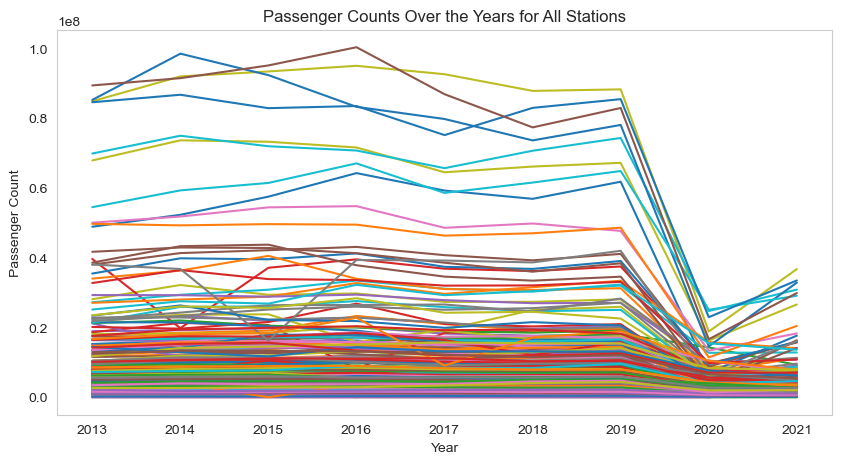

In [66]:

#Visualising overalll trend on stations

plt.figure(figsize=(10, 5))
for Station in df_transposed.columns[1:]:
    sns.lineplot(data = df_transposed, x=df_transposed.index, y= df_transposed[Station])

plt.title('Passenger Counts Over the Years for All Stations')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
#plt.legend(df_transposed.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

### model

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
mergeddf_formodel = pd.read_csv('finaldfforml.csv')
mergeddf_trunc = mergeddf_formodel[mergeddf_formodel['Year'] <= 2018]
mergeddf_trunc.head()


trunc_station_data = mergeddf_trunc[['Station','Category','WeekdayEnEx','SaturdayEnEx','SundayEnEx','TotalEnExCount','Year']]
trunc_station_data.head(10)

# Strip leading and trailing spaces
trunc_station_data['Category'] = trunc_station_data['Category'].str.strip()
trunc_station_data['Category'].unique()
#trunc_station_data

C:\Users\akhil\AppData\Local\Temp\ipykernel_23300\3304747770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_station_data['Category'] = trunc_station_data['Category'].str.strip()


array(['Metro', 'Destination', 'Local', 'Gateway'], dtype=object)

In [69]:
mergeddf_trunc

,Station,Category,Zone,LineCount,TotPlatforms,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
0,Acton Town,Metro,3,2,4,18071,12654,8797,5.75,2013
1,Acton Town,Metro,3,2,4,18797,13982,9768,6.06,2014
2,Acton Town,Metro,3,2,4,19401,14197,9972,6.24,2015
3,Acton Town,Metro,3,2,4,19575,13960,10106,6.27,2016
4,Acton Town,Metro,3,2,4,18913,18913,9529,5.73,2017
...,...,...,...,...,...,...,...,...,...,...
433,Wood Lane,Metro,2,2,2,12283,9951,6065,3.98,2014
434,Wood Lane,Metro,2,2,2,11534,9519,4836,3.70,2015
435,Wood Lane,Metro,2,2,2,11452,9234,5106,3.68,2016
436,Wood Lane,Metro,2,2,2,12873,12873,4761,3.80,2017


In [70]:
trunc_station_data

,Station,Category,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
0,Acton Town,Metro,18071,12654,8797,5.75,2013
1,Acton Town,Metro,18797,13982,9768,6.06,2014
2,Acton Town,Metro,19401,14197,9972,6.24,2015
3,Acton Town,Metro,19575,13960,10106,6.27,2016
4,Acton Town,Metro,18913,18913,9529,5.73,2017
...,...,...,...,...,...,...,...
433,Wood Lane,Metro,12283,9951,6065,3.98,2014
434,Wood Lane,Metro,11534,9519,4836,3.70,2015
435,Wood Lane,Metro,11452,9234,5106,3.68,2016
436,Wood Lane,Metro,12873,12873,4761,3.80,2017


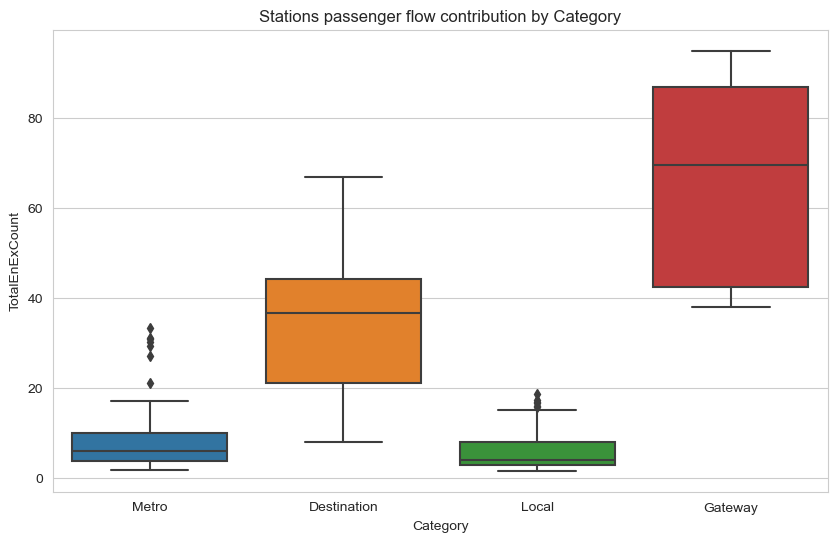

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Category' vs. 'TotalEnExCount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='TotalEnExCount', data=trunc_station_data)
plt.title('Stations passenger flow contribution by Category')
plt.show()


In [74]:
#finding top stations by passenger count

# Calculate the total passenger counts for each station
total_counts = totalCountbyYear_df.sum(axis=1)
# Select the top N stations
top5_stations = total_counts.nlargest(5).index.tolist()
bottom5_stations = total_counts.nsmallest(5).index.tolist()

# Print or use the top stations
print("Top Stations:")
print(top5_stations)
print("\nlow passenger Stations:")
print(bottom5_stations)

Top Stations:
["King's Cross St. Pancras", 'Waterloo', 'Oxford Circus', 'Victoria', 'London Bridge']

low passenger Stations:
['Nine Elms', 'Battersea Power Station', 'Roding Valley', 'Chigwell', 'Grange Hill']


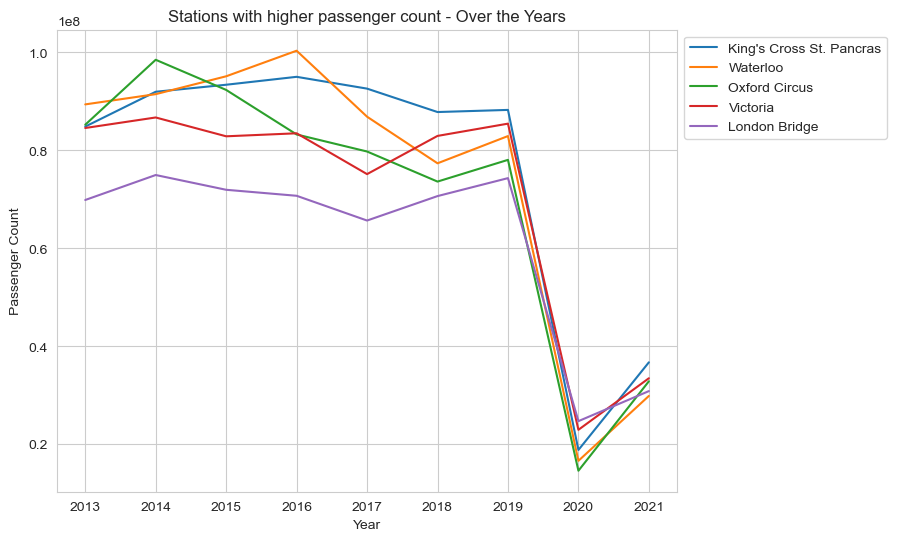

In [75]:
#replotting only top
plt.figure(figsize=(8, 6))
for Station in top7_stations:
    sns.lineplot(data = df_transposed, x=df_transposed.index, y= df_transposed[Station],label=Station)
#    plt.plot(df_transposed.index, df_transposed[station], label=station)

plt.title('Stations with higher passenger count - Over the Years')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend(top7_stations, loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

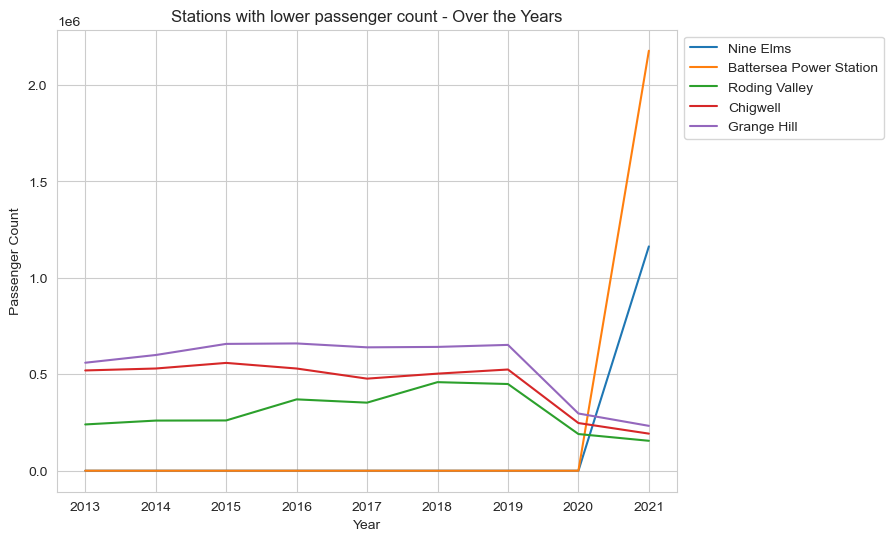

In [76]:
# Replotting only the bottom stations
plt.figure(figsize=(8, 6))
for station in bottom7_stations:
    sns.lineplot(data=df_transposed, x=df_transposed.index, y=df_transposed[station], label=station)

plt.title('Stations with lower passenger count - Over the Years')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.show()

In [77]:
merged_df2.head()

,NLC,Station,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
0,500,Acton Town,18071,12654,8797,5750000,2013
1,502,Aldgate,24569,6539,5453,6880000,2013
2,503,Aldgate East,36467,24047,20111,11660000,2013
3,505,Alperton,9245,6617,4641,2960000,2013
4,506,Amersham,6833,3441,2262,2040000,2013


In [78]:
# Select Station name and year
station_name = 'Waterloo'
year = 2015

# Filter the DataFrame for the specified station and year
filtered_stationdf = merged_df2[(merged_df2['Station'] == station_name) & (merged_df2['Year'] == year)]

filtered_stationdf.head()
#print(filtered_stationdf.dtypes)

,NLC,Station,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
244,747,Waterloo,305343,203983,123381,95138374,2015


          WeekdayEnEx  SaturdayEnEx  SundayEnEx
Station                                        
Waterloo       305343        203983      123381
    Day of Week  Passenger Count
0   WeekdayEnEx           305343
1  SaturdayEnEx           203983
2    SundayEnEx           123381


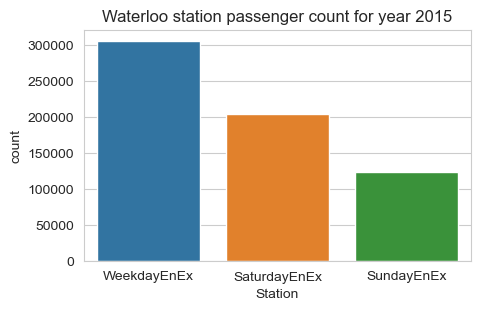

In [79]:
# Plot a bar plot
plt.figure(figsize=(5, 3))
daycount_df = filtered_stationdf[['Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx']]

daycount_df = daycount_df.set_index('Station')
print(daycount_df)

# Reshape the DataFrame
daycount_df = daycount_df.melt(var_name='Day of Week', value_name='Passenger Count')
print(daycount_df)


ax = sns.barplot(x='Day of Week', y='Passenger Count', data=daycount_df)
plt.xlabel('Station')
plt.ylabel('count')
plt.title(f'{station_name} station passenger count for year {year}')

plt.show()

                     Station   Day of Week  Passenger Count
0   King's Cross St. Pancras   WeekdayEnEx           281920
1              London Bridge   WeekdayEnEx           241475
2              Oxford Circus   WeekdayEnEx           249599
3                   Victoria   WeekdayEnEx           275409
4                   Waterloo   WeekdayEnEx           279344
5   King's Cross St. Pancras  SaturdayEnEx           234453
6              London Bridge  SaturdayEnEx           199731
7              Oxford Circus  SaturdayEnEx           236119
8                   Victoria  SaturdayEnEx           222193
9                   Waterloo  SaturdayEnEx           185467
10  King's Cross St. Pancras    SundayEnEx           189817
11             London Bridge    SundayEnEx           123223
12             Oxford Circus    SundayEnEx           135470
13                  Victoria    SundayEnEx           160919
14                  Waterloo    SundayEnEx           108055


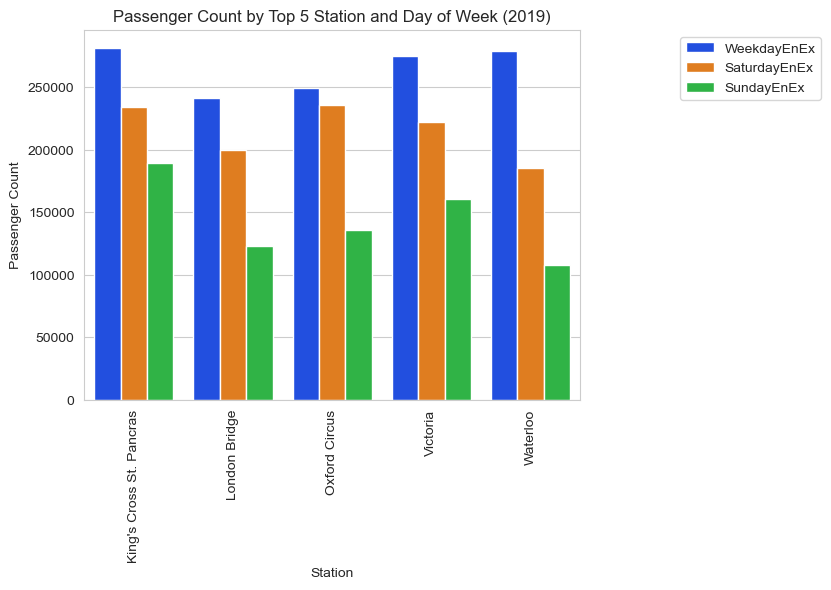

In [80]:
# Filter the DataFrame for the specified year
filtered_df = merged_df2[merged_df2['Year'] == 2019]

# Select the columns of interest
daycount_df2 = filtered_df[['Station', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx']]

# Filter the DataFrame for the top 5 stations
daycount_df2 = daycount_df2[daycount_df2['Station'].isin(top7_stations)]


# Reshape the DataFrame
daycount_df2 = daycount_df2.melt(id_vars='Station', var_name='Day of Week', value_name='Passenger Count')
print(daycount_df2)

# Create a bar plot
sns.set_style('whitegrid')
ax = sns.barplot(x='Station', y='Passenger Count', hue='Day of Week', data=daycount_df2,palette='bright')
ax.set_xlabel('Station')
ax.set_ylabel('Passenger Count')
ax.set_title('Passenger Count by Top 5 Station and Day of Week (2019)')

plt.xticks(rotation=90)
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.show()